<a href="https://colab.research.google.com/github/rareshnz/Licenta_Ciuperci/blob/main/Pre_antrenat_ciuperci.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications.efficientnet import preprocess_input
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam


In [4]:
dataset_path = "/content/drive/MyDrive/Mushrooms"


categories = os.listdir(dataset_path)
num_categories = len(categories)
X = []
y = []

In [5]:
for idx, category in enumerate(categories):
    category_path = os.path.join(dataset_path, category)
    for img_name in os.listdir(category_path):
        img_path = os.path.join(category_path, img_name)
        img = cv2.imread(img_path)
        img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
        img = cv2.resize(img, (224, 224))
        X.append(img)
        y.append(idx)

X = np.array(X)
y = np.array(y)

In [6]:
X

array([[[[ 15,  66,  47],
         [ 17,  67,  39],
         [ 20,  69,  38],
         ...,
         [  5,   9,  24],
         [ 14,  13,  17],
         [ 20,  24,  27]],

        [[ 16,  68,  46],
         [ 24,  74,  46],
         [ 14,  60,  32],
         ...,
         [  6,  27,  38],
         [  4,   9,  21],
         [ 41,  39,  46]],

        [[ 14,  68,  37],
         [ 23,  73,  46],
         [ 15,  60,  37],
         ...,
         [ 20,  63,  69],
         [ 13,  34,  49],
         [ 22,  28,  40]],

        ...,

        [[  0,   0,   2],
         [  2,   2,   4],
         [  7,   7,   9],
         ...,
         [  4,  27,   7],
         [  8,  30,   9],
         [  8,  30,   9]],

        [[  1,   1,   3],
         [  1,   1,   3],
         [  6,   6,   8],
         ...,
         [  8,  32,   8],
         [  8,  32,   6],
         [ 12,  35,   9]],

        [[  1,   1,   3],
         [  1,   1,   3],
         [  4,   4,   6],
         ...,
         [  6,  32,   5],
        

In [7]:
y

array([ 0,  0,  0, ..., 11, 11, 11])

In [8]:
X_preprocessed = preprocess_input(X)

In [9]:
X_preprocessed

array([[[[ 15,  66,  47],
         [ 17,  67,  39],
         [ 20,  69,  38],
         ...,
         [  5,   9,  24],
         [ 14,  13,  17],
         [ 20,  24,  27]],

        [[ 16,  68,  46],
         [ 24,  74,  46],
         [ 14,  60,  32],
         ...,
         [  6,  27,  38],
         [  4,   9,  21],
         [ 41,  39,  46]],

        [[ 14,  68,  37],
         [ 23,  73,  46],
         [ 15,  60,  37],
         ...,
         [ 20,  63,  69],
         [ 13,  34,  49],
         [ 22,  28,  40]],

        ...,

        [[  0,   0,   2],
         [  2,   2,   4],
         [  7,   7,   9],
         ...,
         [  4,  27,   7],
         [  8,  30,   9],
         [  8,  30,   9]],

        [[  1,   1,   3],
         [  1,   1,   3],
         [  6,   6,   8],
         ...,
         [  8,  32,   8],
         [  8,  32,   6],
         [ 12,  35,   9]],

        [[  1,   1,   3],
         [  1,   1,   3],
         [  4,   4,   6],
         ...,
         [  6,  32,   5],
        

In [10]:
X_train, X_val, y_train, y_val = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)


In [11]:
datagen = ImageDataGenerator(rotation_range=20, width_shift_range=0.1, height_shift_range=0.1, zoom_range=0.1, horizontal_flip=True)
datagen.fit(X_train)

In [12]:
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))

x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.5)(x)
predictions = Dense(num_categories, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)

for layer in base_model.layers:
    layer.trainable = False

model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Antrenarea modelului
history = model.fit(datagen.flow(X_train, y_train, batch_size=32), epochs=100, validation_data=(X_val, y_val))


16705208/16705208 [==============================] - 0s 0us/step
Epoch 1/100
239/239 [==============================] - 89s 307ms/step - loss: 1.3866 - accuracy: 0.5365 - val_loss: 0.9804 - val_accuracy: 0.6712
Epoch 2/100
239/239 [==============================] - 71s 298ms/step - loss: 0.9515 - accuracy: 0.6791 - val_loss: 0.8398 - val_accuracy: 0.7153
Epoch 3/100
239/239 [==============================] - 71s 298ms/step - loss: 0.8091 - accuracy: 0.7216 - val_loss: 0.7750 - val_accuracy: 0.7431
Epoch 4/100
239/239 [==============================] - 71s 298ms/step - loss: 0.7172 - accuracy: 0.7571 - val_loss: 0.7447 - val_accuracy: 0.7562
Epoch 5/100
239/239 [==============================] - 72s 302ms/step - loss: 0.6782 - accuracy: 0.7755 - val_loss: 0.7223 - val_accuracy: 0.7593
Epoch 6/100
239/239 [==============================] - 72s 299ms/step - loss: 0.6142 - accuracy: 0.7870 - val_loss: 0.6937 - val_accuracy: 0.7792
Epoch 7/100
239/239 [==============================] - 71s 

In [14]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 rescaling (Rescaling)          (None, 224, 224, 3)  0           ['input_1[0][0]']                
                                                                                                  
 normalization (Normalization)  (None, 224, 224, 3)  7           ['rescaling[0][0]']              
                                                                                                  
 rescaling_1 (Rescaling)        (None, 224, 224, 3)  0           ['normalization[0][0]']      

In [15]:
def plot_training_history(history):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

    # Plot accuracy
    ax1.plot(history.history['accuracy'], label='Train Accuracy')
    ax1.plot(history.history['val_accuracy'], label='Validation Accuracy')
    ax1.set_title('Accuracy')
    ax1.set_xlabel('Epoch')
    ax1.set_ylabel('Accuracy')
    ax1.legend(loc='lower right')

    # Plot loss
    ax2.plot(history.history['loss'], label='Train Loss')
    ax2.plot(history.history['val_loss'], label='Validation Loss')
    ax2.set_title('Loss')
    ax2.set_xlabel('Epoch')
    ax2.set_ylabel('Loss')
    ax2.legend(loc='upper right')

    plt.tight_layout()
    plt.show()
    

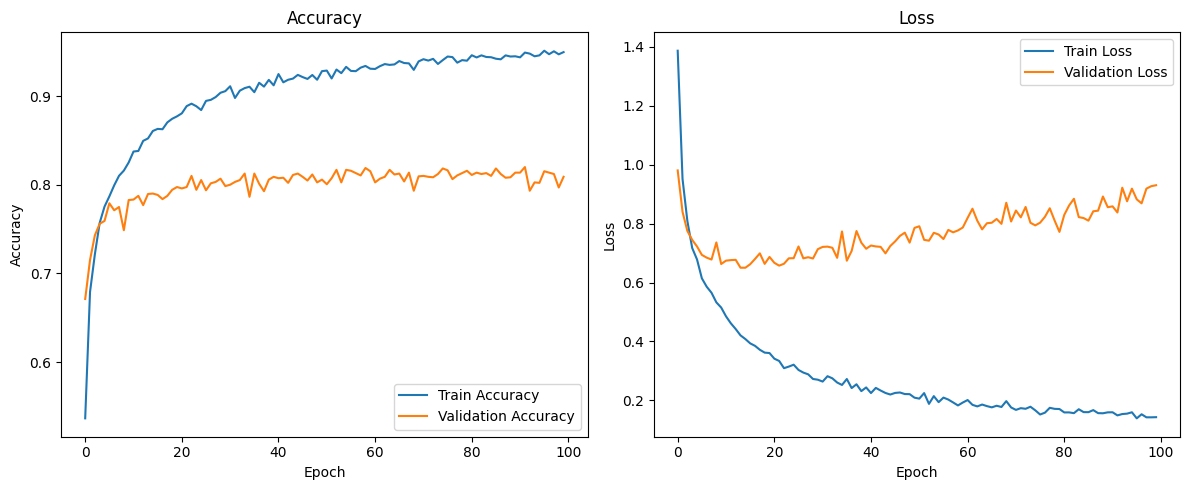

In [16]:
plot_training_history(history)

60/60 [==============================] - 2s 13ms/step


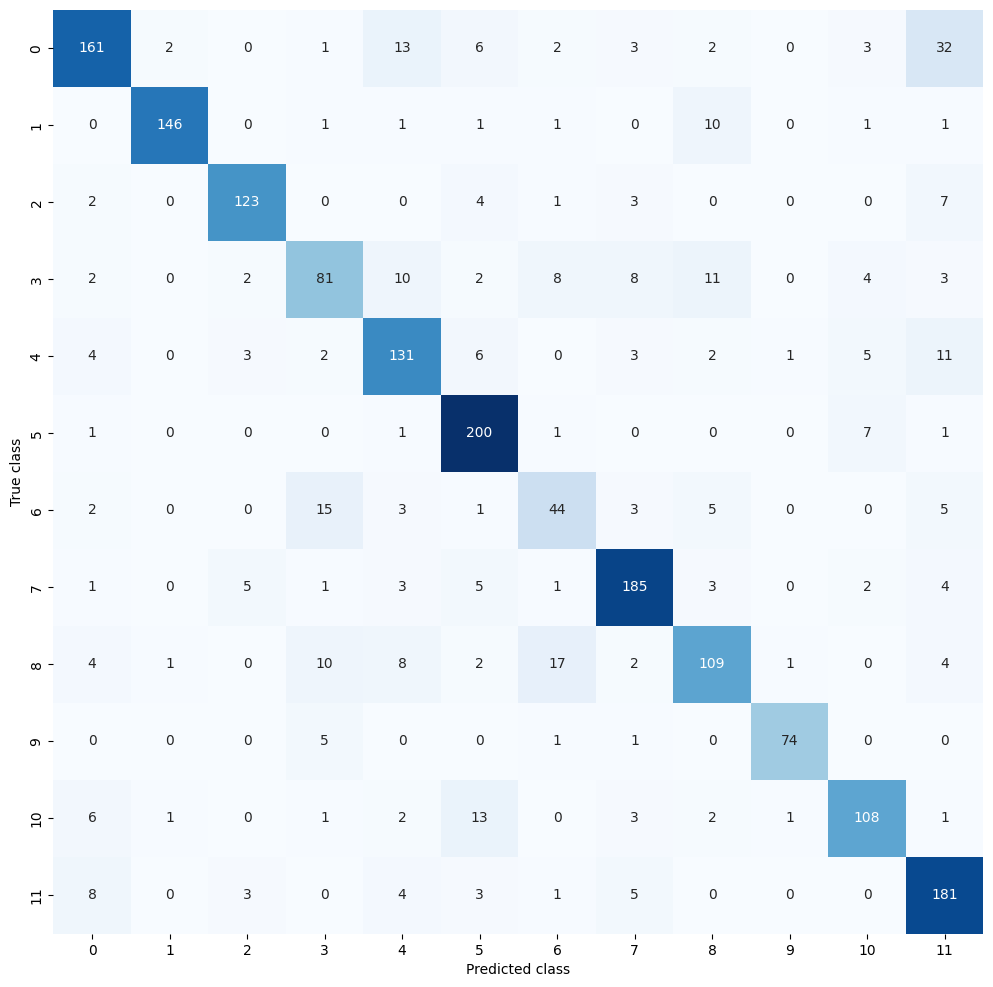

In [17]:
import numpy as np
import seaborn as sns
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(model, X_val, y_val):
    y_pred = np.argmax(model.predict(X_val), axis=1)
    cm = confusion_matrix(y_val, y_pred)
    plt.figure(figsize=(12, 12))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.ylabel('True class')
    plt.xlabel('Predicted class')
    plt.show()

plot_confusion_matrix(model, X_val, y_val)

60/60 [==============================] - 1s 13ms/step


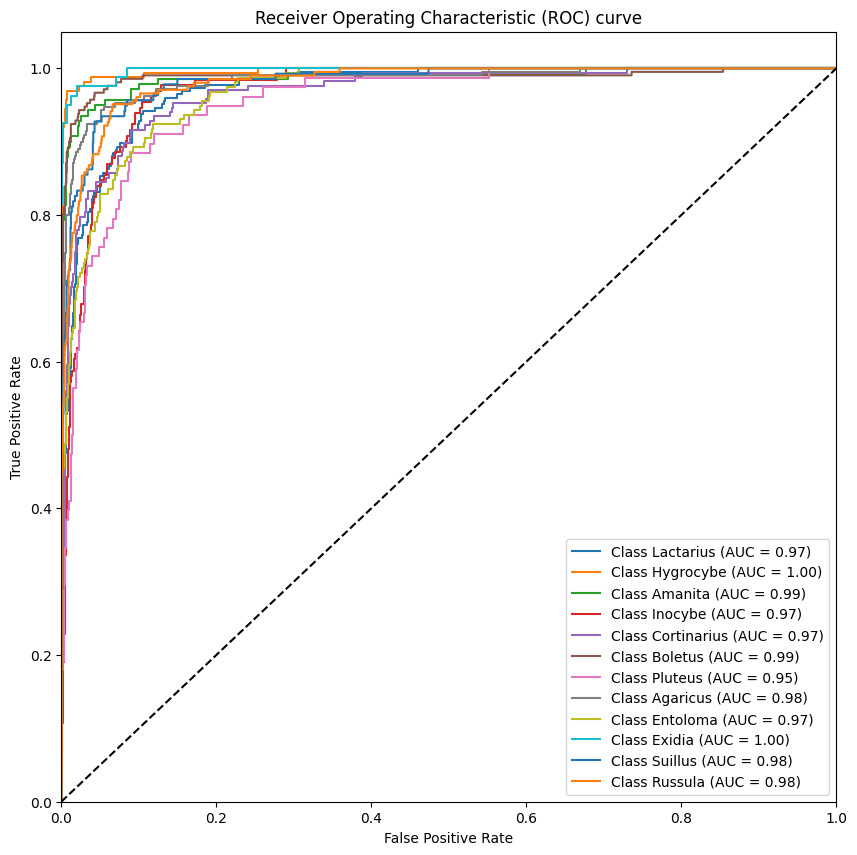

In [18]:
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.preprocessing import label_binarize
import numpy as np

def plot_roc_and_auc(model, X_val, y_val, categories):
    n_classes = len(categories)
    
    y_val_binarized = label_binarize(y_val, classes=np.arange(n_classes))
    y_pred = model.predict(X_val)
    
    fpr = dict()
    tpr = dict()
    roc_auc = dict()
    
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_val_binarized[:, i], y_pred[:, i])
        roc_auc[i] = roc_auc_score(y_val_binarized[:, i], y_pred[:, i])

    # Plot ROC curve
    plt.figure(figsize=(10, 10))
    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], label=f'Class {categories[i]} (AUC = {roc_auc[i]:.2f})')

    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) curve')
    plt.legend(loc="lower right")
    plt.show()

plot_roc_and_auc(model, X_val, y_val, categories)

In [19]:
from sklearn.metrics import classification_report


def print_classification_report(model, X_val, y_val, categories):
    y_pred = np.argmax(model.predict(X_val), axis=1)
    report = classification_report(y_val, y_pred, target_names=categories)
    print(report)

print_classification_report(model, X_val, y_val, categories)

60/60 [==============================] - 1s 13ms/step
              precision    recall  f1-score   support

   Lactarius       0.84      0.72      0.77       225
   Hygrocybe       0.97      0.90      0.94       162
     Amanita       0.90      0.88      0.89       140
     Inocybe       0.69      0.62      0.65       131
 Cortinarius       0.74      0.78      0.76       168
     Boletus       0.82      0.95      0.88       211
     Pluteus       0.57      0.56      0.57        78
    Agaricus       0.86      0.88      0.87       210
    Entoloma       0.76      0.69      0.72       158
      Exidia       0.96      0.91      0.94        81
     Suillus       0.83      0.78      0.81       138
     Russula       0.72      0.88      0.80       205

    accuracy                           0.81      1907
   macro avg       0.81      0.80      0.80      1907
weighted avg       0.81      0.81      0.81      1907



In [20]:
from sklearn.metrics import cohen_kappa_score
import numpy as np

y_pred = np.argmax(model.predict(X_val), axis=1)
kappa = cohen_kappa_score(y_val, y_pred)
print("Cohen's Kappa:", kappa)

60/60 [==============================] - 1s 13ms/step
Cohen's Kappa: 0.7899462601006287


In [21]:
from sklearn.metrics import confusion_matrix
import numpy as np

y_pred = np.argmax(model.predict(X_val), axis=1)
cm = confusion_matrix(y_val, y_pred)
false_positive_rate = cm.sum(axis=0) / cm.sum()
false_negative_rate = cm.sum(axis=1) / cm.sum()
print("False Positive Rate:", false_positive_rate)
print("False Negative Rate:", false_negative_rate)

60/60 [==============================] - 1s 13ms/step
False Positive Rate: [0.10015732 0.07865758 0.0713162  0.06135291 0.09229156 0.12742528
 0.04037756 0.11326691 0.07551127 0.04037756 0.0681699  0.13109596]
False Negative Rate: [0.11798637 0.08495018 0.07341374 0.06869428 0.08809649 0.11064499
 0.04090194 0.11012061 0.08285265 0.04247509 0.07236497 0.10749869]


fine tuning 

In [22]:
base_model = EfficientNetB0(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(1024, activation='relu')(x)
predictions = Dense(len(categories), activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=predictions)
for layer in base_model.layers:
    layer.trainable = False
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history = model.fit(datagen.flow(X_train, y_train, batch_size=32), epochs=10, validation_data=(X_val, y_val))

Epoch 1/10
239/239 [==============================] - 79s 304ms/step - loss: 1.0589 - accuracy: 0.6379 - val_loss: 0.8184 - val_accuracy: 0.7268
Epoch 2/10
239/239 [==============================] - 71s 297ms/step - loss: 0.6690 - accuracy: 0.7722 - val_loss: 0.7416 - val_accuracy: 0.7436
Epoch 3/10
239/239 [==============================] - 71s 299ms/step - loss: 0.5333 - accuracy: 0.8169 - val_loss: 0.7091 - val_accuracy: 0.7693
Epoch 4/10
239/239 [==============================] - 72s 300ms/step - loss: 0.4464 - accuracy: 0.8478 - val_loss: 0.7117 - val_accuracy: 0.7724
Epoch 5/10
239/239 [==============================] - 72s 300ms/step - loss: 0.3793 - accuracy: 0.8680 - val_loss: 0.8068 - val_accuracy: 0.7436
Epoch 6/10
239/239 [==============================] - 72s 301ms/step - loss: 0.3277 - accuracy: 0.8843 - val_loss: 0.7395 - val_accuracy: 0.7672
Epoch 7/10
239/239 [==============================] - 72s 301ms/step - loss: 0.2680 - accuracy: 0.9112 - val_loss: 0.8110 - val_ac

In [23]:
for layer in base_model.layers[-20:]:
    layer.trainable = True
model.compile(optimizer=Adam(learning_rate=0.0001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_fine_tuning = model.fit(datagen.flow(X_train, y_train, batch_size=32), epochs=20, validation_data=(X_val, y_val))

Epoch 1/20
239/239 [==============================] - 84s 307ms/step - loss: 0.3974 - accuracy: 0.8676 - val_loss: 0.7257 - val_accuracy: 0.8002
Epoch 2/20
239/239 [==============================] - 71s 298ms/step - loss: 0.1946 - accuracy: 0.9313 - val_loss: 0.6904 - val_accuracy: 0.8091
Epoch 3/20
239/239 [==============================] - 71s 299ms/step - loss: 0.1431 - accuracy: 0.9536 - val_loss: 0.6664 - val_accuracy: 0.8201
Epoch 4/20
239/239 [==============================] - 71s 298ms/step - loss: 0.1137 - accuracy: 0.9612 - val_loss: 0.6506 - val_accuracy: 0.8228
Epoch 5/20
239/239 [==============================] - 72s 300ms/step - loss: 0.0987 - accuracy: 0.9685 - val_loss: 0.6419 - val_accuracy: 0.8243
Epoch 6/20
239/239 [==============================] - 72s 299ms/step - loss: 0.0823 - accuracy: 0.9755 - val_loss: 0.6399 - val_accuracy: 0.8364
Epoch 7/20
239/239 [==============================] - 72s 299ms/step - loss: 0.0692 - accuracy: 0.9786 - val_loss: 0.6419 - val_ac

In [31]:
import tensorflow as tf
tf.saved_model.save(model, "/content/drive/MyDrive/efficientnet_model_tf_finetuning")

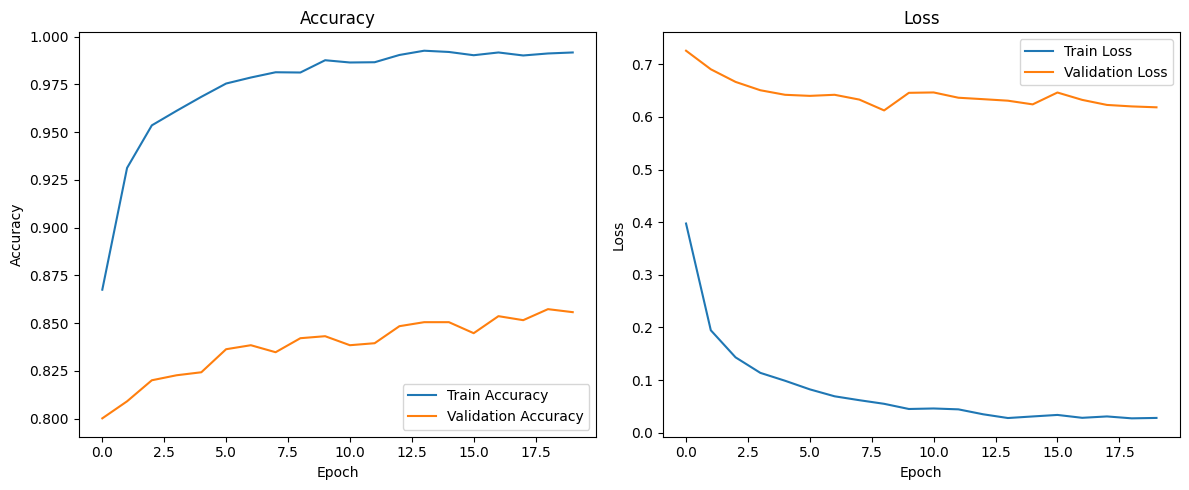

In [25]:
plot_training_history(history_fine_tuning)

60/60 [==============================] - 2s 13ms/step


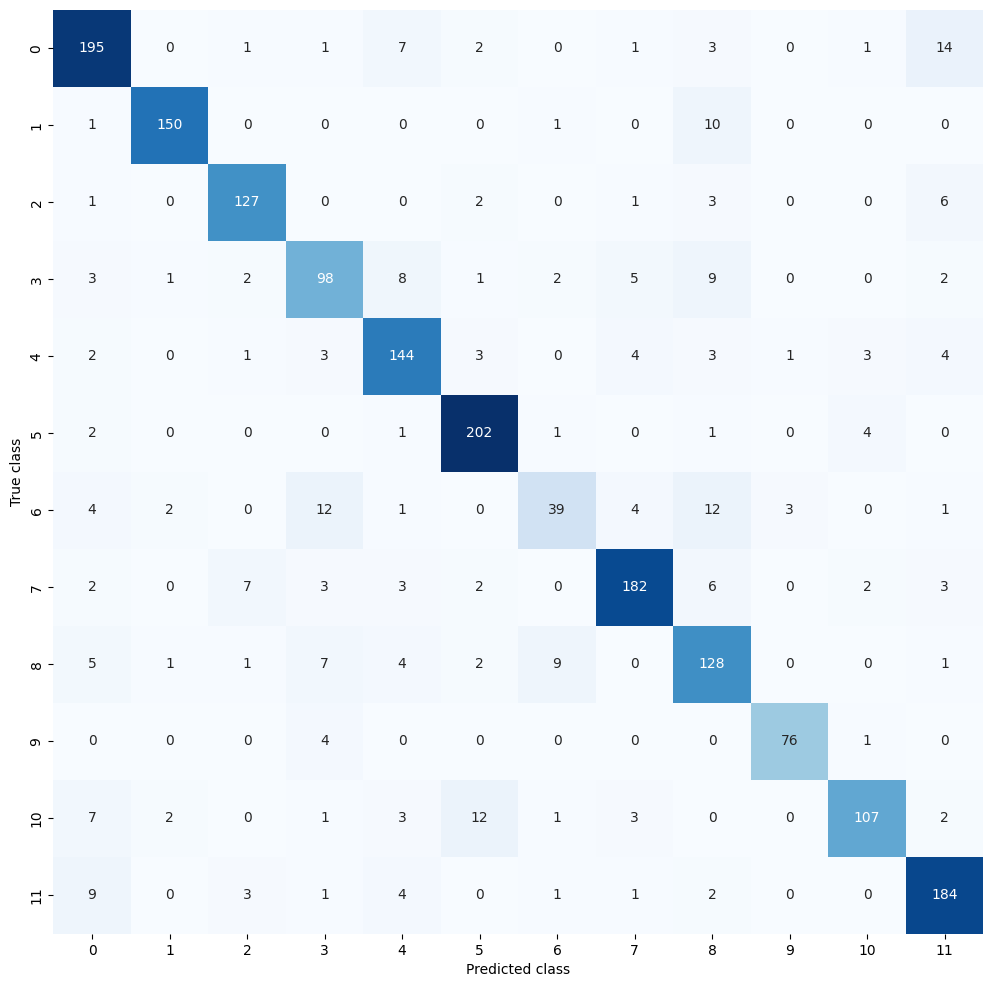

In [26]:
plot_confusion_matrix(model, X_val, y_val)

In [27]:
print_classification_report(model, X_val, y_val, categories)

60/60 [==============================] - 1s 13ms/step
              precision    recall  f1-score   support

   Lactarius       0.84      0.87      0.86       225
   Hygrocybe       0.96      0.93      0.94       162
     Amanita       0.89      0.91      0.90       140
     Inocybe       0.75      0.75      0.75       131
 Cortinarius       0.82      0.86      0.84       168
     Boletus       0.89      0.96      0.92       211
     Pluteus       0.72      0.50      0.59        78
    Agaricus       0.91      0.87      0.89       210
    Entoloma       0.72      0.81      0.76       158
      Exidia       0.95      0.94      0.94        81
     Suillus       0.91      0.78      0.84       138
     Russula       0.85      0.90      0.87       205

    accuracy                           0.86      1907
   macro avg       0.85      0.84      0.84      1907
weighted avg       0.86      0.86      0.85      1907



60/60 [==============================] - 1s 13ms/step


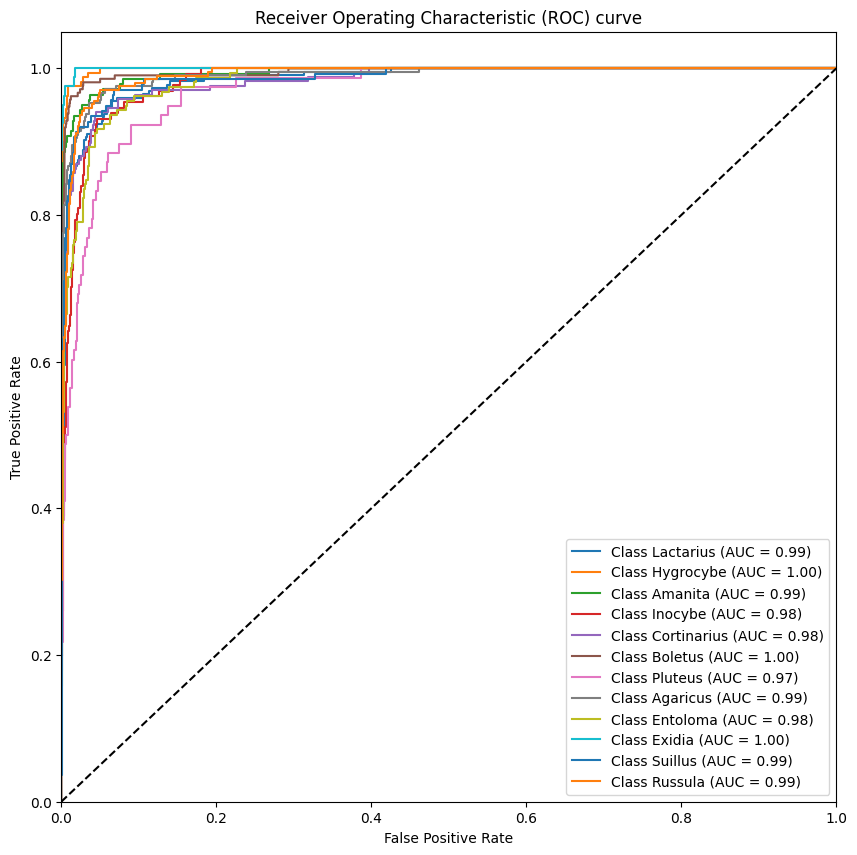

In [28]:
plot_roc_and_auc(model, X_val, y_val, categories)

In [29]:
y_pred = np.argmax(model.predict(X_val), axis=1)
kappa = cohen_kappa_score(y_val, y_pred)
print("Cohen's Kappa:", kappa)

60/60 [==============================] - 1s 13ms/step
Cohen's Kappa: 0.8412646283683878


In [30]:
y_pred = np.argmax(model.predict(X_val), axis=1)
cm = confusion_matrix(y_val, y_pred)
false_positive_rate = cm.sum(axis=0) / cm.sum()
false_negative_rate = cm.sum(axis=1) / cm.sum()
print("False Positive Rate:", false_positive_rate)
print("False Negative Rate:", false_negative_rate)

60/60 [==============================] - 1s 13ms/step
False Positive Rate: [0.12113267 0.08180388 0.07446251 0.0681699  0.09176717 0.11851075
 0.02831673 0.10540115 0.09281594 0.04195071 0.06187729 0.1137913 ]
False Negative Rate: [0.11798637 0.08495018 0.07341374 0.06869428 0.08809649 0.11064499
 0.04090194 0.11012061 0.08285265 0.04247509 0.07236497 0.10749869]
